# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')
%matplotlib notebook

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [2]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = (((np.pi)**(D/2))/(sp.gamma(1+D/2)))*(R**D)
    
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

Известные значения:
$$
V_2 = \pi R^2 , V_3 = \frac{4}{3} \pi R^3
$$
Тогда 
$$ 
\frac{V_2}{\pi} = 1
$$


In [3]:
print(getSphereVolumeExact(2, R = 1.0)/np.pi)

1.0


$$
3 \frac{V_3}{\pi} = 4
$$

In [4]:
print(getSphereVolumeExact(3, R = 1.0)/np.pi*3)

4.0


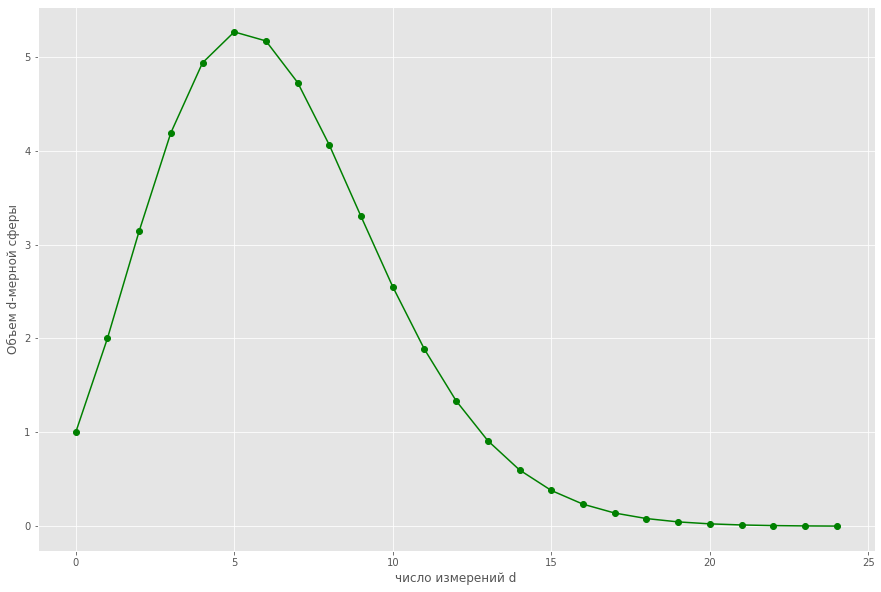

In [46]:
x = np.arange(25)
y = []

for i in x:
    y.append(getSphereVolumeExact(i, R = 1.0))
y = np.array(y)

plt.figure(figsize = (15,10))
plt.xlabel('число измерений d')
plt.ylabel('Объем d-мерной сферы')
plt.plot(x, y, '-o', color ='green')
plt.show()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [6]:
!pip install tqdm
from tqdm import tqdm

In [7]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    res = []

    for _ in tqdm(range(N)):
        
        spot = 2 * np.random.random_sample(size = D) - 1 
        
        res.append(np.linalg.norm(spot) < 1) 
                          #There are hits and there are misses.. and then there are misses.
    n = np.mean(res)
    
    return n*(2**D)  

In [31]:
print('Число Пи посчитанное на миллионе случайных точек:', getSphereVolumePseudorandom(1000000, 2, R = 1), 'Точное:', np.pi)

100%|████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:07<00:00, 136752.55it/s]


Число Пи посчитанное на миллионе случайных точек: 3.141112 Точное: 3.141592653589793


Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

In [9]:
def f(N, D, R = 1): #продублируем getSphereVolumePseudorandom, чтобы в дальнейшем избежать спама от модуля tqdm
   
    res = []

    for _ in range(N):
        
        spot = 2 * np.random.random_sample(size = D) - 1 
        
        res.append(np.linalg.norm(spot) < 1)  
        
    n = np.mean(res)
    
    return n*(2**D) 

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:57<00:00,  7.24s/it]


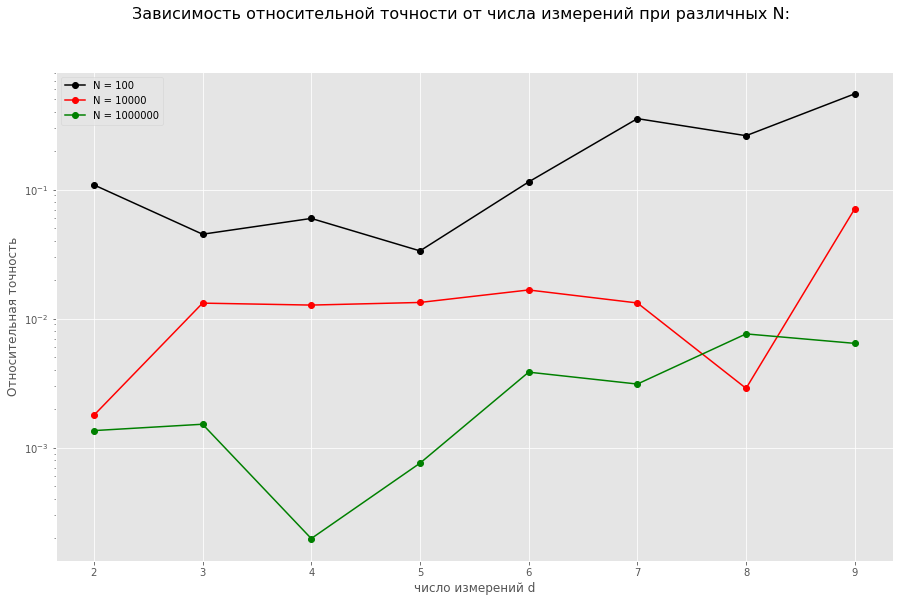

In [45]:
d = np.arange(2, 10)

def accuracy(N):
    
    e = []
    
    for j in tqdm(d):
        V_e = getSphereVolumeExact(j, R = 1.0)
        V_r = f(N, j, R = 1)
        e.append(abs(1 - V_r/V_e))
    
    return e

y1 = accuracy(100)
y2 = accuracy(10000)
y3 = accuracy(1000000)

plt.figure(figsize = (15, 9))
plt.suptitle('Зависимость относительной точности от числа измерений при различных N:', fontsize = 16)

plt.semilogy(d, y1, '-o', color ='black', label = 'N = 100')
plt.xlabel('число измерений d')
plt.semilogy(d, y2, '-o', color ='red', label = 'N = 10000')
plt.semilogy(d, y3, '-o', color ='green', label = 'N = 1000000')
plt.xlabel('число измерений d')
plt.ylabel('Относительная точность')
plt.legend()

plt.show()
        

Как несложно было догадаться, стохастический характер исследования не мог дать конкретной или хорошо аппроксимируемой зависимости  точности от числа измерений d или числа узлов N. Однако, мы можем наблюдать ухудшение точности с ростом размерности при постоянном количестве точек, равно как и улучшение точности с увеличением числа случайных точек и неизменной размерности. 

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [28]:
!pip install sobol_seq
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [82]:
sobol_seq.i4_sobol_generate?

In [47]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    res = []
    
    N = 2*(sobol_seq.i4_sobol_generate(D, N)) - 1
    
    for i in tqdm(N):
        res.append(np.linalg.norm(i)<1)
        
    n = np.mean(res)
   
    return n*(2**D)

In [48]:
getSphereVolumeQuasirandom(1000000, 2, R = 1)

100%|████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:03<00:00, 267305.95it/s]


3.14176

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

In [33]:
def f1(N, D, R = 1):
    
    res = []
    
    N = 2*(sobol_seq.i4_sobol_generate(D, N)) - 1
    
    for i in N:
        res.append(np.linalg.norm(i)<1)
        
    n = np.mean(res)
   
    return n*(2**D)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:52<00:00, 21.52s/it]


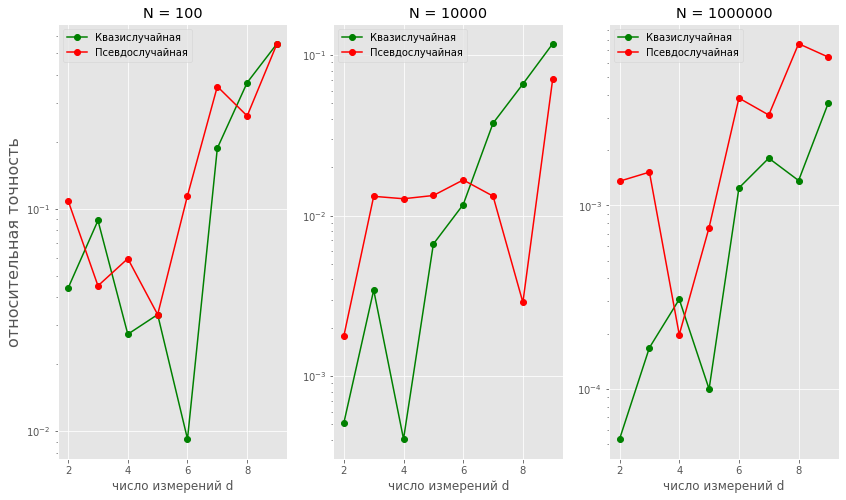

In [49]:
def accuracy1(N):
    
    e = []
    
    for j in tqdm(d):
        V_e = getSphereVolumeExact(j, R = 1.0)
        V_r = f1(N, j, R = 1)
        e.append(abs(1 - V_r/V_e))
    
    return e

z1 = accuracy1(100)
z2 = accuracy1(10000)
z3 = accuracy1(1000000)

plt.figure(figsize = (14, 8))


plt.subplot(131)
plt.title('N = 100')
plt.semilogy(d, z1, '-o', color ='green', label = 'Квазислучайная')
plt.semilogy(d, y1, '-o', color ='red', label = 'Псевдослучайная')
plt.xlabel('число измерений d')
plt.ylabel('относительная точность', fontsize = 16)
plt.legend()

plt.subplot(132)
plt.title('N = 10000')
plt.semilogy(d, z2, '-o', color ='green', label = 'Квазислучайная')
plt.semilogy(d, y2, '-o', color ='red', label = 'Псевдослучайная')
plt.xlabel('число измерений d')
plt.legend()

plt.subplot(133)
plt.title('N = 1000000')
plt.semilogy(d, z3, '-o', color ='green', label = 'Квазислучайная')
plt.semilogy(d, y3, '-o', color ='red', label = 'Псевдослучайная')
plt.xlabel('число измерений d')
plt.legend()

plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Очевидно, квази-Монте-Карло справляется с поставленной задачей успешнее Монте-Карло, работающего на псевдослучайных последовательностях. Это хорошо видно на правом графике, где для всех за исключением одного значений размерности, последовательность Соболь обеспечила превосходящую точность.

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [ ]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [ ]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [ ]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [ ]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [ ]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [ ]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

In [ ]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

In [ ]:
# Write your answer here

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [ ]:
N = 64
state = getInitialState(N)

In [ ]:
plt.figure()
# Write your code here
makeFlip(0.5, state);

In [ ]:
# Write your answer here